In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns=None

<h3> Data Ingestion followed by Exploration </h3>

In [2]:
data=pd.read_excel('bankdata.xls')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#checking the datatypes of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Let's also check the five point summary statistic for the continues values 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<ol>
    <li>Looking at the count we can aslo check for the missing values</li>
    <li> The central tendency mean will give the average value in the respective feature
      <li> The Standard Deviation is the square root of variance (it generally elucidates how far is the value from the mean)
          <li> The min, max , 25%,50%,75% points will explain the spread of data weather it's skewed or not or can also check for the outliers
              <li>If we look at the age at 75% is the value 48 means (75% of the values are below 48) . The max is 95 potential outlier or the extreme value . Too early to take a call
                  <li> same with Balance, Duration (result in skewed distribution).
                      <li> pdays and previous yet to explore more 

In [5]:
#Grabbing the categorical columns
col=data.select_dtypes(include='object').columns

In [6]:
#Changing the Object datatype to Category datatype
data[col]=data[col].astype('category')

In [7]:
#checking the information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
y            45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [8]:
print('Number of categorical features:',len(data.select_dtypes(include='category').columns))
print('Number of Numerical features:',len(data.select_dtypes(include='int64').columns))

Number of categorical features: 10
Number of Numerical features: 7


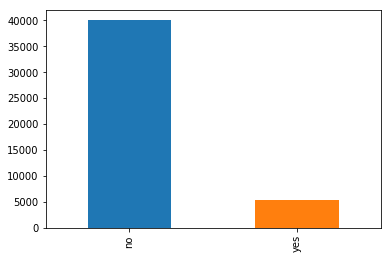

In [9]:
data['y'].value_counts().plot.bar()
plt.show()

In [10]:
print('The proportion of y=yes is :',(len(data[data['y']=='yes'])/len(data['y']))*100)
print('The proportion of y=no is :',(len(data[data['y']=='no'])/len(data['y']))*100)

The proportion of y=yes is : 11.698480458295547
The proportion of y=no is : 88.30151954170445


<h3>Outliers or Extreme values?

In [11]:
data[(data['age']<40) & (data['job']=='retired')][['age','job','housing','loan']]

,age,job,housing,loan
173,35,retired,no,no
860,33,retired,no,no
1804,39,retired,no,no
3953,24,retired,no,yes
4479,39,retired,no,no
4943,39,retired,yes,no
5034,34,retired,no,no
5762,36,retired,yes,yes
7142,38,retired,no,no
10195,39,retired,yes,no


In [12]:
print('maximum balance:',data['balance'].max())
print('mean balance:',data['balance'].mean())
print('minimum balance:',data['balance'].min())

maximum balance: 102127
mean balance: 1362.2720576850766
minimum balance: -8019


In [13]:
data[data['balance']>80000][['balance','job']]

,balance,job
26227,98417,management
39989,102127,management
42558,81204,retired
43393,81204,retired


In [14]:
data[data['balance']<-3000][['balance','job','default','loan','housing']]

,balance,job,default,loan,housing
1896,-3313,self-employed,yes,yes,yes
7413,-3372,management,yes,no,yes
12909,-8019,blue-collar,yes,yes,no
15682,-6847,management,yes,yes,no
32713,-3058,self-employed,no,yes,yes
38736,-4057,management,no,no,yes


In [15]:
q1=data['balance'].quantile(.25)
q3=data['balance'].quantile(.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [16]:
data['balance'][data['balance']<=ll]=ll

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
print('Null Values Check:')
print(data.isnull().sum())

Null Values Check:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


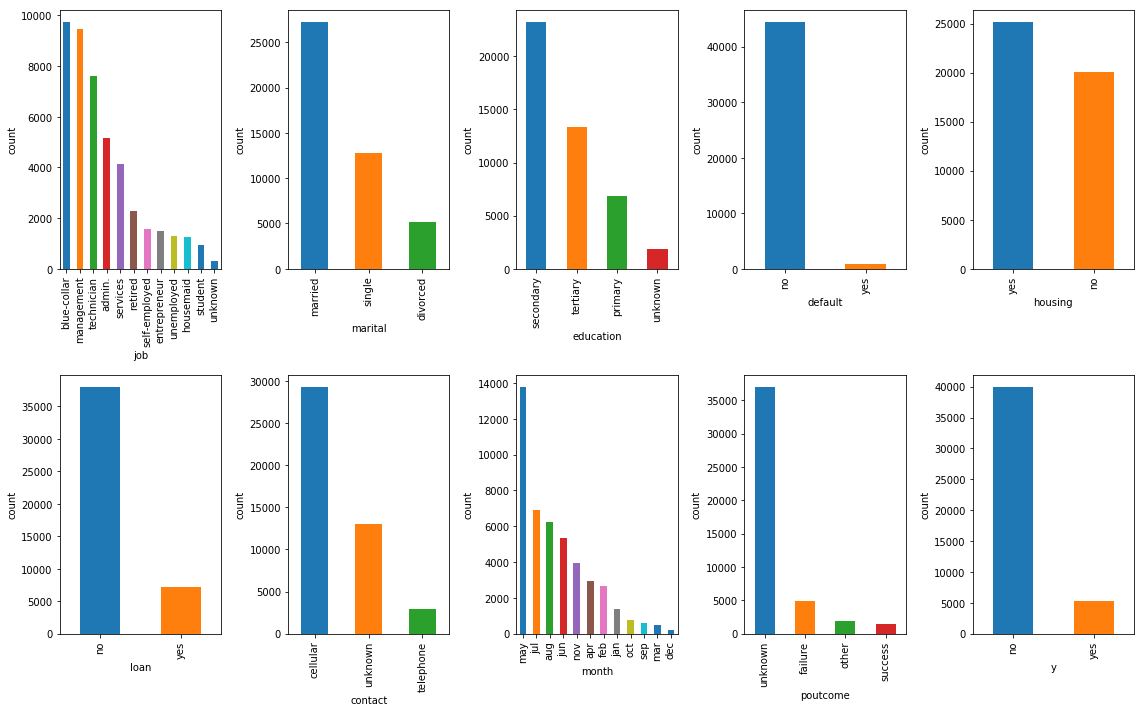

In [18]:
#let's carry out a basic count plot on the categorical variables to look at the proportion
plt.figure(figsize=(16,10))
i=1
for c in col:
    plt.subplot(2,5,i)
    data[c].value_counts().plot.bar()
    i+=1
    plt.xlabel(c)
    plt.ylabel('count')
plt.tight_layout()
plt.show()

<ul>
<li>Job: We mostly have blue-collar,management and technicians in the feature
    <li>Marital: We mostly have married in the feature
        <li>Education : We mostly have secondary level in the feature
             <li>Default : We mostly have no credit defaulters in the feature
                 <li>Housing : We mostly have house loaners in the feature
                     <li>Housing : We mostly have house loaners in the feature
                     <li>Housing : We mostly have house loaners in the feature
                     <li>Loan : We mostly have customers with no personal loans in the feature
                     <li>Contact : The campaign is and was mostly carried out Through Cellular
                         <li>Month: Maximum may month in the feature
                             <li>:poutcome: The previous campaign outcome is mostly unknown
                                 

In [19]:
#let's look at the numerical features
num_col=data.select_dtypes(include='int64').columns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


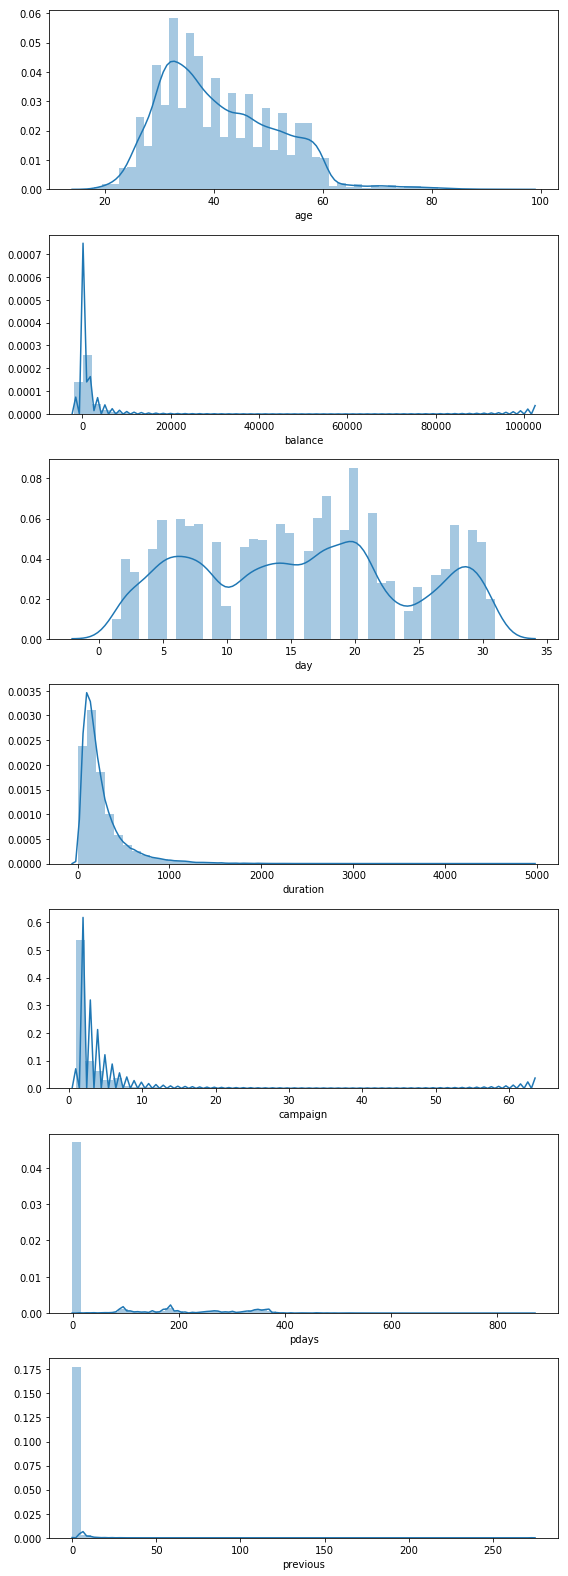

In [20]:
#density plot check in the numerical features
plt.figure(figsize=(8,22))
i=1
for c in num_col:
    plt.subplot(7,1,i)
    sns.distplot(data[c])
    i+=1
    
plt.tight_layout()
plt.show()

<ul>
<li> Age: I see the age is mostly distributed around late twenties to late thirties 
    <li> Balance: Average yearly balance stacked around single digit thousands
        <li>Day: Last time campaigners contacted the customers for that month evenly distributed
            <li>Duration: last contact duration in seconds msotly arounds the hundred's
                <li>Camapign: Number of calls made durring the camapign mostly below 10 calls but few went beyong 60 times
                    

In [21]:
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [22]:
#removing the y variable
col=list(col)
col.remove('y')

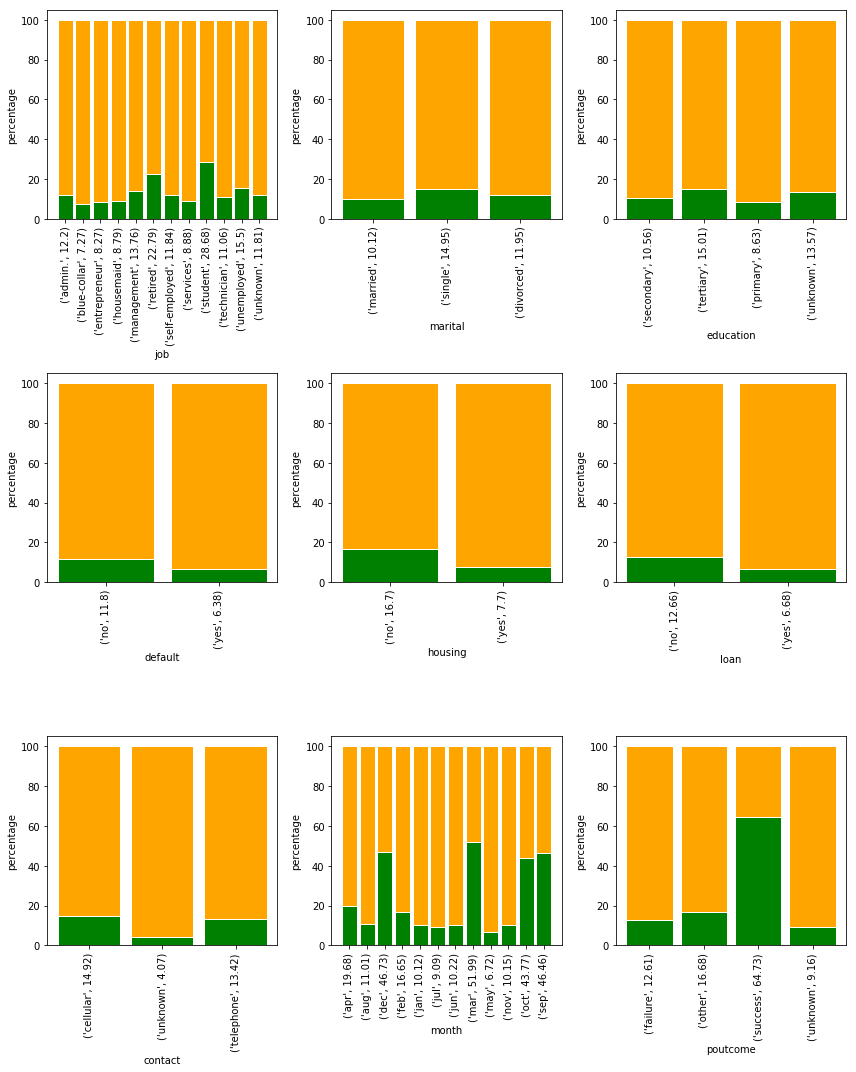

In [23]:
#percentage(%) Bar Graph for the categorical variables (the % of target variables in each feature)
plt.figure(figsize=(12,15))
K=1
for c in col:
    r = list(np.arange(0,len(data[c].value_counts().index)))
    

    # From  value to percentage
    Yes=data[data['y']=='yes'][c].value_counts()
    No=data[data['y']=='no'][c].value_counts()
    total=Yes.add(No, fill_value=0)
    Yes=(Yes/total)*100
    No=(No/total)*100

    # plot
    barWidth = 0.85
    names = tuple(Yes.index)
    plt.subplot(3,3,K)
    
    # Create Yes Bars
    plt.bar(r, list(Yes.values), color='green', edgecolor='white', width=barWidth)
    # Create No Bars
    plt.bar(r, list(No.values), bottom=list(Yes.values), color='orange', edgecolor='white', width=barWidth)
    Yes=[round(i,2) for i in Yes.values]
    No=[round(i,2) for i in No.values]
    # Custom x axis
    plt.xticks(r,list(zip(names,Yes)),rotation=90)
    plt.xlabel(c)
    plt.ylabel('percentage')
    K+=1
# Show graphic
plt.tight_layout()
plt.show()

<ul>
    <li>Job: The maximum % of clients who subscribed for TermDeposit are students (28.6%) and retired people (17.4%)
        <li>Marital: The maximum % of clients who subscribed for TermDeposit are single people (14.9%)
            <li>Education: The maximum % of clients who subscribed for TermDeposit have a tertiary level (15.0%)
                <li>Default: The maximum % of clients who subscribed for TermDeposit do not have a credit in default (11.8%)
                    <li>Housing: The maximum % of clients who subscribed for TermDeposit have housing loan (16.7%)
                        <li>Loan: The maximum % of clients who subscribed for TermDeposit do not have personal loan (12.6%)
                            <li>Contact : The maximum % of clients who subscribed for TermDeposit were contacted through the cellular mode of communication, as a part of campaingn by the bank (14.9%)
                                <li>Month : The maximum % of clients who subscribed for TermDeposit were contacted last on the month of March of that year (51.9%)
                                    <li>Poutcome: The maximum % of clients subscribed for the TermDeposit also had subscribed during the previous campaign. which means the campaign is working successfully in majority for the previous campaign where the out come that's successful. The customer retainment seems to be working.
                                        <li> Here I am Jus comapring the 'Yes' proportion horizantally for the specific features. Any how The 'No' proportion leads compared to 'Yes' individually (vertical).
                                     

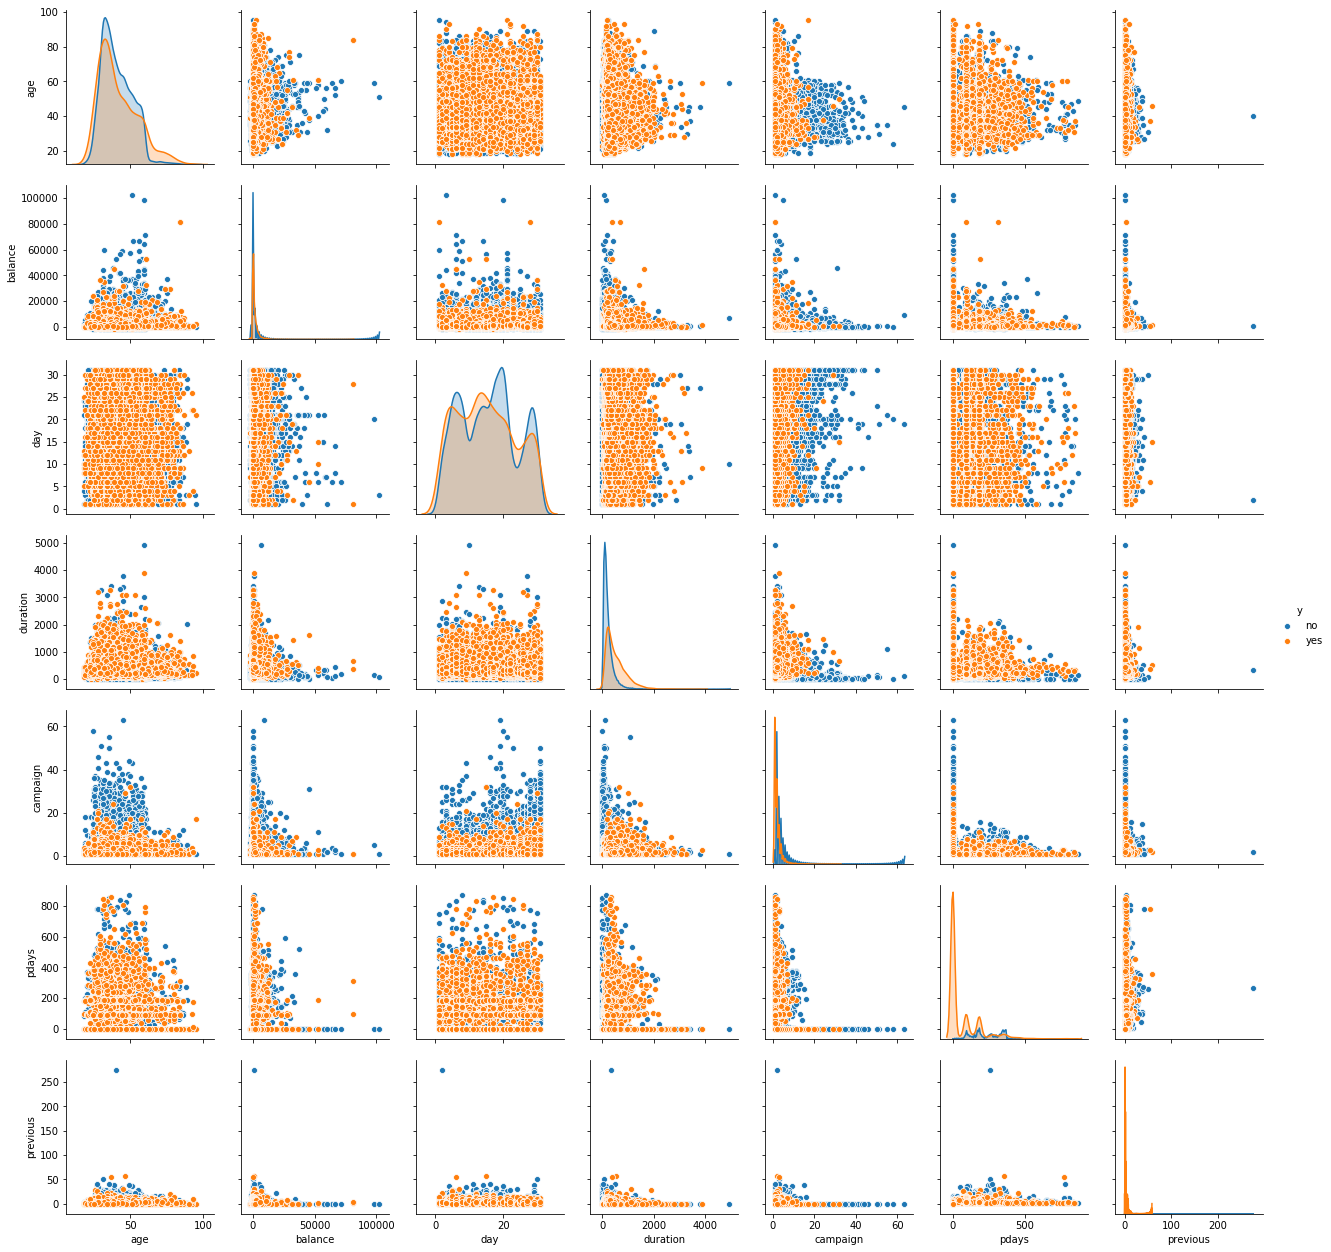

In [24]:
#Pair Plot (the visual summary on the whole data)
sns.pairplot(data,hue='y')
plt.show()

<ul>
<li>The pairplot Generally elucidates the relationship between the numerical features also you can further add the dimesion of a category here its the target variable to have a Three Dimesional visualization 
    <li>I do not see any positive or a negative relation between any of the variables
        <li>Looking at the density plot, The features seems to be skewed(mostly positive-right sided).

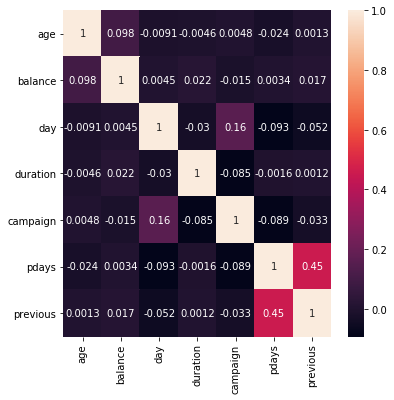

In [25]:
#heatmap with co relation on numerical features
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True)

<li> I do not see any significant relation even in a quantifiable visual

<h4>We can carry out chi-square test for every categorical variable with the target 'y' categorical variable to check for the independance.

<h4><li>H0:There is no statistically significant relationship between Depandant and the Independant variable.
    
    
    
<li>Ha:There is a statistically significant relationship between Depandant and the Independant variable.

In [26]:
import researchpy as rp

In [27]:
category=['job','education','marital','default','housing','loan','contact','month','poutcome']
for c in category :
    table, results = rp.crosstab(data[c],data['y'], test= 'chi-square')
    print(results)
    print('='*45)

                 Chi-square test   results
0  Pearson Chi-square ( 11.0) =   836.1055
1                     p-value =     0.0000
2                  Cramer's V =     0.1360
                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   238.9235
1                    p-value =     0.0000
2                 Cramer's V =     0.0727
                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   196.4959
1                    p-value =     0.0000
2                 Cramer's V =     0.0659
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   22.7235
1                    p-value =    0.0000
2               Cramer's phi =    0.0224
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   875.6937
1                    p-value =     0.0000
2               Cramer's phi =     0.1392
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   210.1949
1                    p-value =     0.0000
2               Cramer's phi =    

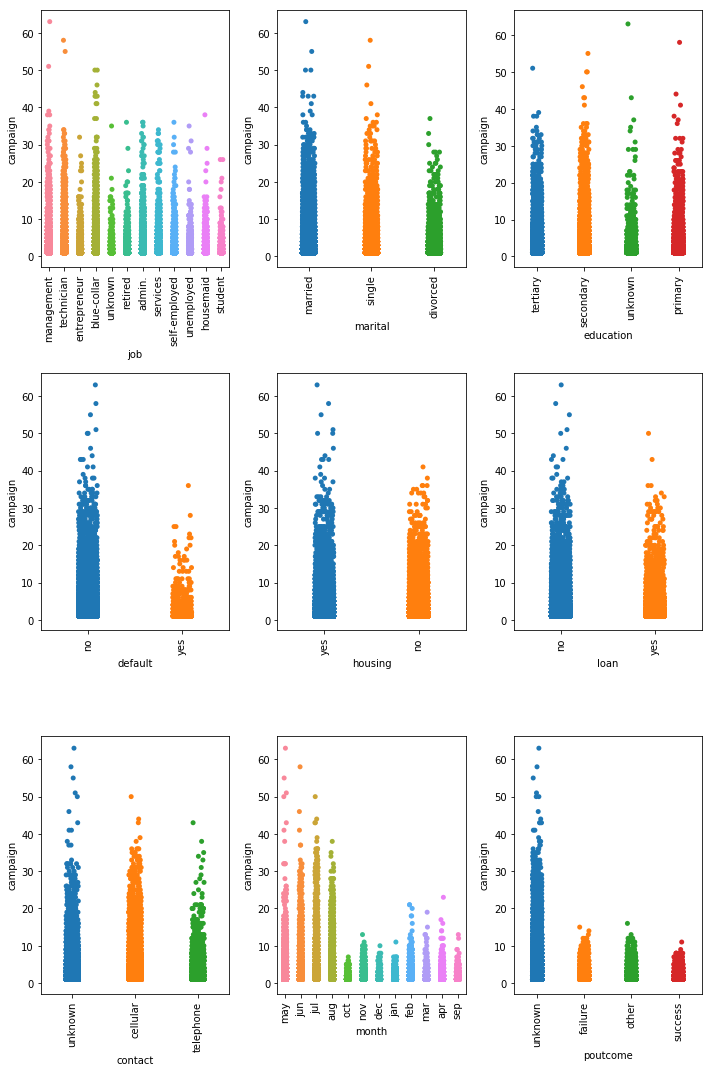

In [28]:
#Lets see the number of contacts thats being made through out the months and Let me take other categorical features into the consideration
plt.figure(figsize=(10,15))
columnn=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']
data[columnn]=data[columnn].astype('object')
i=1
for c in columnn:
    r = list(np.arange(0,len(data[c].value_counts().index)))
    plt.subplot(3,3,i)
    sns.stripplot(data[c],data['campaign'])
    names = tuple(data[c].unique())
    #locs,labels = plt.xticks()
    plt.xticks(r,names,rotation=90)
    i+=1
plt.tight_layout()
plt.show()

<ol>
<li>Job: I see that most of the call are being made to those who are in services,management and admins
    <li>Marital: I see that most of the call are being made to married and singles
        <li>Education : I see the calls are spread evenly almost, but I see mostly being made to the one in the tertiary level and Notice one call being made more than 60 times in the primary category.
            <li>Default: Campaign calls are mostly carried out to those who do not have their credit in default.
                <li>Housing : Campaign calls are mostly carried out to those who do have housing loans.
                    <li> loan: Campaign calls are mostly carried out to those who do not have any personal loans.
                        <li>contact: I see that most of the call are being made through cellular and unkown but the frequency is more though the Cellular we see it crossed 60 calls.
                         <li>Month: So, Here the campaign is mostly carried out in the months of May,July,August and June. Moderately in the months of September,October and March. Less in the months of January,February,April,November and December
                             <li> poutcome: The most call are being made to depending up on the previous camapining outcomes that is unknown.

In [29]:
data[columnn]=data[columnn].astype('category')

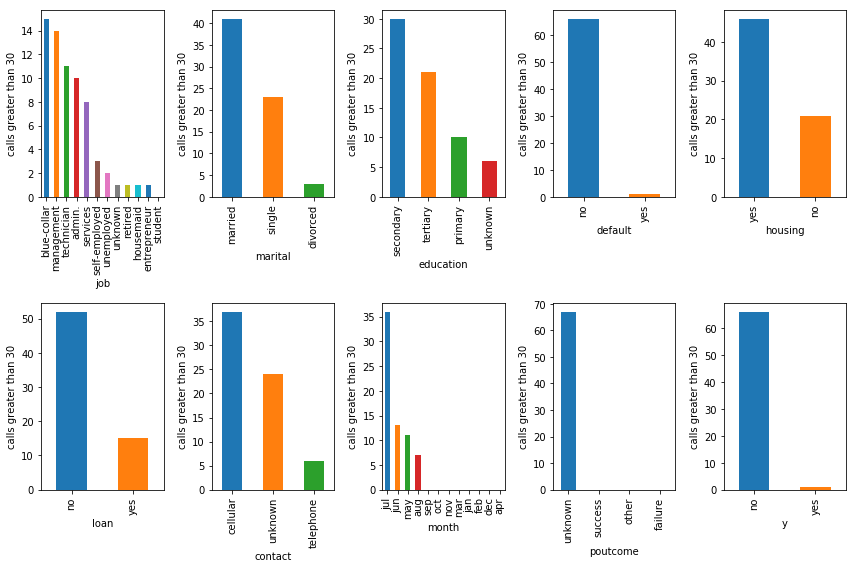

In [30]:
#let's check the calls made more tahn 30 times during camapign to see if it went successful and see the same with other categorical features
col1=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']
plt.figure(figsize=(12,8))
i=1
for c in col1:
    plt.subplot(2,5,i)
    data[data['campaign'] >= 30][c].value_counts().plot.bar()
    i+=1
    plt.xlabel(c)
    plt.ylabel('calls greater than 30')
plt.tight_layout()
plt.show()

<ul>
<li>I am surprised even though the calls are made frequently, the campaigners could not make customers subscribe for the term deposits.

<h3> Feature Engineering
    

In [31]:
#creating another feature named Age Group
category = pd.cut(data.age,bins=[13,19,29,59,99],labels=['Teen Aged','Youth','Middle Aged','Old Aged'])
data.insert(1,'Age Group',category)

In [32]:
#creating another feature Weighted months
#Here I am creating the months weights with respect to the calls that are being made respectively
#Looking at the stripplot, campaign against the categorical variables
value={'may' : 'Busy Month','jun':'Busy Month','jul':'Busy Month','aug':'Busy Month',
     'feb': 'Moderate Month','jan': 'Moderate Month','apr': 'Moderate Month','nov' : 'Moderate Month',
     'mar': 'Low Month','sep': 'Low Month','oct': 'Low Month','dec' : 'Low Month'}
category=data['month'].map(value)
data.insert(10,'Weighted Months',category)

In [33]:
coll=['job','marital','contact','poutcome']
df=pd.DataFrame()
df=data[coll]
df=pd.get_dummies(df,prefix_sep='-',drop_first=True)
data=pd.concat([data,df],axis=1)

In [34]:
data.drop(columns=['job','marital','contact','poutcome','month','age'],inplace=True)

In [35]:
data.head()

,Age Group,education,default,balance,housing,loan,Weighted Months,day,duration,campaign,pdays,previous,y,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed,job-unknown,marital-married,marital-single,contact-telephone,contact-unknown,poutcome-other,poutcome-success,poutcome-unknown
0,Middle Aged,tertiary,no,2143,yes,no,Busy Month,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,Middle Aged,secondary,no,29,yes,no,Busy Month,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
2,Middle Aged,secondary,no,2,yes,yes,Busy Month,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,Middle Aged,unknown,no,1506,yes,no,Busy Month,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,Middle Aged,unknown,no,1,no,no,Busy Month,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


In [36]:
value={'Middle Aged':3, 'Youth':2, 'Old Aged':4, 'Teen Aged':1}

In [37]:
data['Age Group']=data['Age Group'].map(value)

In [38]:
value={'secondary':2, 'tertiary':3, 'primary':1, 'unknown':0}

In [39]:
data['education']=data['education'].map(value)

In [40]:
value={'Busy Month':3, 'Moderate Month':2, 'Low Month':1}

In [41]:
data['Weighted Months']=data['Weighted Months'].map(value)

In [42]:
data.head()

,Age Group,education,default,balance,housing,loan,Weighted Months,day,duration,campaign,pdays,previous,y,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed,job-unknown,marital-married,marital-single,contact-telephone,contact-unknown,poutcome-other,poutcome-success,poutcome-unknown
0,3,3,no,2143,yes,no,3,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,3,2,no,29,yes,no,3,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
2,3,2,no,2,yes,yes,3,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,3,0,no,1506,yes,no,3,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,3,0,no,1,no,no,3,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1


In [43]:
value={'yes':1,'no':0}

In [44]:
data['HasCreditDefault?']=data['default'].map(value)

In [45]:
data['HasHousingLoan?']=data['housing'].map(value)

In [46]:
data['HasPersonalLoan?']=data['loan'].map(value)

In [47]:
#converting the target varible to binary as well
data['y']=data['y'].map(value)

In [48]:
#deleting the old variables
data.drop(columns=['default','housing','loan'],inplace=True)

In [49]:
#converting the seconds durationto minutes
data['duration']=round(data['duration']/60,2)

In [50]:
data.head()

,Age Group,education,balance,Weighted Months,day,duration,campaign,pdays,previous,y,job-blue-collar,job-entrepreneur,job-housemaid,job-management,job-retired,job-self-employed,job-services,job-student,job-technician,job-unemployed,job-unknown,marital-married,marital-single,contact-telephone,contact-unknown,poutcome-other,poutcome-success,poutcome-unknown,HasCreditDefault?,HasHousingLoan?,HasPersonalLoan?
0,3,3,2143,3,5,4.35,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
1,3,2,29,3,5,2.52,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,3,2,2,3,5,1.27,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1
3,3,0,1506,3,5,1.53,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
4,3,0,1,3,5,3.30,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0


<h3>Base Model Building

In [179]:
x=data.drop(columns=['y'])
y=data['y']

In [211]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,auc,roc_auc_score,roc_curve,f1_score,auc,recall_score,precision_score,precision_recall_curve,classification_report\
,confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)

In [182]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
Log.fit(x_,y_)
ypred=Log.predict(xtest)
accuracy_score(ytest,ypred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8326882671679753

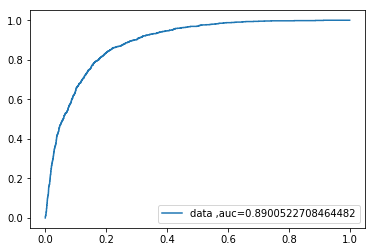

0.5246622683003456

In [183]:
ypred_proba=Log.predict_proba(xtest)[::,1]
fpr,tpr,_=roc_curve(ytest,ypred_proba)
auc=roc_auc_score(ytest,ypred_proba)
plt.plot(fpr,tpr,label='data ,auc='+str(auc))
plt.legend(loc=4)
plt.show()
f1_score(ytest,ypred)


In [184]:
confusion_matrix(ytest,ypred)

array([[6695, 1285],
       [ 228,  835]], dtype=int64)

In [185]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7980
           1       0.39      0.79      0.52      1063

    accuracy                           0.83      9043
   macro avg       0.68      0.81      0.71      9043
weighted avg       0.90      0.83      0.85      9043



In [212]:
Algorithms = [
    GaussianNB(),

    LogisticRegression(),

   KNeighborsClassifier(n_neighbors=3),
 
  DecisionTreeClassifier(),
    
    AdaBoostClassifier(),
    
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()
    
    ]

In [213]:
alg_columns = []
alg_compare = pd.DataFrame()


row_index = 0
for alg in Algorithms:
    
    
    predicted = alg.fit(xtrain, ytrain).predict(xtest)
    fp, tp, th = roc_curve(ytest, predicted)
    alg_name = alg.__class__.__name__
    alg_compare.loc[row_index,'Alg Name'] = alg_name
    alg_compare.loc[row_index, 'Alg Train Accuracy'] = round(alg.score(xtrain, ytrain), 4)
    alg_compare.loc[row_index, 'Alg Test Accuracy'] = round(alg.score(xtest, ytest), 4)
    alg_compare.loc[row_index, ' Precission'] = precision_score(ytest, predicted)
    alg_compare.loc[row_index, ' Recall'] = recall_score(ytest, predicted)
    alg_compare.loc[row_index, ' f1-score'] = f1_score(ytest, predicted)
    
    row_index+=1
    
alg_compare.sort_values(by = ['Alg Test Accuracy'], ascending = False, inplace = True)    
alg_compare

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Alg Name,Alg Train Accuracy,Alg Test Accuracy,Precission,Recall,f1-score
6,GradientBoostingClassifier,0.9111,0.8990,0.603591,0.411101,0.489088
7,BaggingClassifier,0.9915,0.8973,0.587696,0.422389,0.491516
1,LogisticRegression,0.9014,0.8968,0.611684,0.334901,0.432827
4,AdaBoostClassifier,0.9027,0.8958,0.589630,0.374412,0.457998
5,RandomForestClassifier,0.9917,0.8937,0.581210,0.343368,0.431697
2,KNeighborsClassifier,0.9200,0.8724,0.417722,0.217310,0.285891
3,DecisionTreeClassifier,1.0000,0.8702,0.451273,0.483537,0.466848
0,GaussianNB,0.8434,0.8429,0.382237,0.546566,0.449864


<h3> Scaling the data

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc=StandardScaler()

In [133]:
for i in ['balance',
'duration',
'campaign',
'pdays',
'previous']:
    xtrain.loc[:,i]=sc.fit_transform(xtrain[[i]])
    xtest.loc[:,i]=sc.fit_transform(xtest[[i]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [104]:
Log.fit(xtrain,ytrain)
ypred=Log.predict(xtest)
print(classification_report(ytest,ypred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.61      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [169]:
r=RandomForestClassifier(n_estimators=200,n_jobs=2,random_state=2)

In [170]:
r.fit(x_,y_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
                       oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [171]:
yppp=r.predict(xtest)

In [172]:
print(classification_report(ytest,yppp))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7980
           1       0.59      0.44      0.50      1063

    accuracy                           0.90      9043
   macro avg       0.76      0.70      0.72      9043
weighted avg       0.89      0.90      0.89      9043



Scaling decreased the performance overall so we are not going for it.

<h3> sampling techniques

In [214]:
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek

In [300]:
methods=[
SMOTETomek(ratio='auto',random_state=0),
SMOTE(random_state=0),RandomUnderSampler(random_state=0)]

<h4>SMOTETomek

In [301]:
alg_columns = []
alg_compare = pd.DataFrame()
for m in methods:
    sample_name = m.__class__.__name__
    x_i,y_i=m.fit_sample(xtrain,ytrain)
    


    row_index = 0
    for alg in Algorithms:


        predicted = alg.fit(x_i, y_i).predict(xtest)
        fp, tp, th = roc_curve(ytest, predicted)
        alg_name = alg.__class__.__name__
        alg_compare.loc[row_index,'Alg Name'] = alg_name
        alg_compare.loc[row_index, 'Precission'] = round(precision_score(ytest, predicted),4)
        alg_compare.loc[row_index, 'Recall'] = round(recall_score(ytest, predicted),4)
        alg_compare.loc[row_index, 'f1Score'] = f1_score(ytest, predicted)
        alg_compare.loc[row_index, 'TrainAccuracy'] = round(alg.score(x_, y_), 4)
        alg_compare.loc[row_index, 'TestAccuracy'] = round(alg.score(xtest, ytest), 4)
        

        row_index+=1
    
    alg_compare.sort_values(by = ['f1Score'], ascending = False, inplace = True)
    print(sample_name)
    print('-'*80)
    print(pd.DataFrame(alg_compare))
    print('-'*80)
    print('mean score of f1 results:',alg_compare['f1Score'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SMOTETomek
--------------------------------------------------------------------------------
                     Alg Name  Precission  Recall   f1Score  TrainAccuracy  \
6  GradientBoostingClassifier      0.5596  0.5343  0.546679         0.9444   
1          LogisticRegression      0.3941  0.7808  0.523825         0.8465   
7           BaggingClassifier      0.5580  0.4572  0.502585         0.9958   
4          AdaBoostClassifier      0.5153  0.4760  0.494866         0.9358   
3      DecisionTreeClassifier      0.4386  0.4873  0.461676         1.0000   
5      RandomForestClassifier      0.5759  0.3819  0.459276         0.9962   
0                  GaussianNB      0.2874  0.7253  0.411639         0.7806   
2        KNeighborsClassifier      0.2722  0.5729  0.369091         0.9396   

   TestAccuracy  
6        0.8958  
1        0.8331  
7        0.8936  
4        0.8858  
3        0.8664  
5        0.8943  
0        0.7563  
2        0.7698  
-------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SMOTE
--------------------------------------------------------------------------------
                     Alg Name  Precission  Recall   f1Score  TrainAccuracy  \
6  GradientBoostingClassifier      0.5424  0.5296  0.535935         0.9435   
1          LogisticRegression      0.3934  0.7780  0.522591         0.8463   
7           BaggingClassifier      0.5700  0.4675  0.513695         0.9958   
4          AdaBoostClassifier      0.5010  0.4722  0.486199         0.9350   
3      DecisionTreeClassifier      0.4365  0.4948  0.463845         1.0000   
5      RandomForestClassifier      0.5730  0.3801  0.457014         0.9959   
0                  GaussianNB      0.2897  0.7281  0.414458         0.7831   
2        KNeighborsClassifier      0.2724  0.5682  0.368293         0.9409   

   TestAccuracy  
6        0.8922  
1        0.8329  
7        0.8959  
4        0.8827  
3        0.8655  
5        0.8938  
0        0.7582  
2        0.7709  
------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomUnderSampler
--------------------------------------------------------------------------------
                     Alg Name  Precission  Recall   f1Score  TrainAccuracy  \
6  GradientBoostingClassifier      0.3897  0.8645  0.537270         0.8613   
4          AdaBoostClassifier      0.4024  0.8006  0.535557         0.8427   
5      RandomForestClassifier      0.3913  0.8081  0.527317         0.8974   
7           BaggingClassifier      0.3860  0.8137  0.523608         0.8848   
1          LogisticRegression      0.3877  0.7855  0.519117         0.8439   
3      DecisionTreeClassifier      0.3200  0.7846  0.454620         0.8518   
0                  GaussianNB      0.3076  0.6397  0.415394         0.7240   
2        KNeighborsClassifier      0.2340  0.6792  0.348036         0.7917   

   TestAccuracy  
6        0.8249  
4        0.8368  
5        0.8297  
7        0.8259  
1        0.8289  
3        0.7787  
0        0.7883  
2        0.7009  
-----------------------------------

<h4>Random under sampling is yeilding the better and consistent f1-results 

<h3>So going ahead with randomsampler and grid search cv for gradient boosting

In [308]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=2)


In [ ]:
clf.fit(x_i, y_i)
print(classification_report(ytest,clf.fit(x_i, y_i).predict(xtest) ))
print(clf.best_params_)